## A classification task: record label recognition


In [1]:
#Basic imports
import os
import matplotlib.pyplot as plt
import essentia.standard as ess
import essentia
import numpy as np
import sys

In [2]:
# Raw-data preprocess analysis parameters
fs = 44100
windowSize = 4096 * 4
hopSize = 4096 * 2
NRG_threshold_ratio = 0.01 #threshold expressed as ratio with respect to the maximum value
V_threshold = 0.01 #waveform threshold value
#Let's put in a container to be able to use as a single argument in function calls
params = {"fs":fs, "windowSize":windowSize, "hopSize":hopSize, "V_threshold":V_threshold}

## Analysis and preprocessing of features



In [4]:
import pandas as pd

In [6]:
#Read 
file = 'data_60s_chunk_middle.csv'
data = pd.read_csv(file)
#Let's see the first lines of our data
print(data.shape)


(2169, 111)


In [7]:
data.isnull().sum().sum()#sums a matrix of True/False values obtained by checking if each value is Nan

0

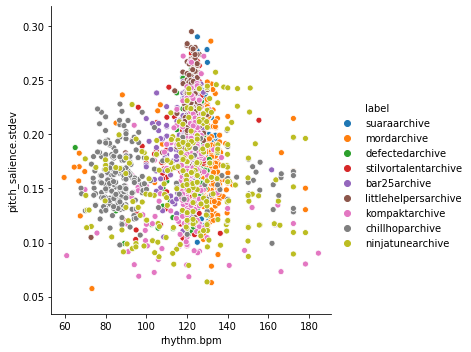

In [8]:
import seaborn as sns
# hue -> Grouping variable that will produce elements with different colors
# style -> Grouping variable that will produce elements with different styles
sns.relplot(x = "rhythm.bpm", y = "pitch_salience.stdev", hue = "label", data = data);

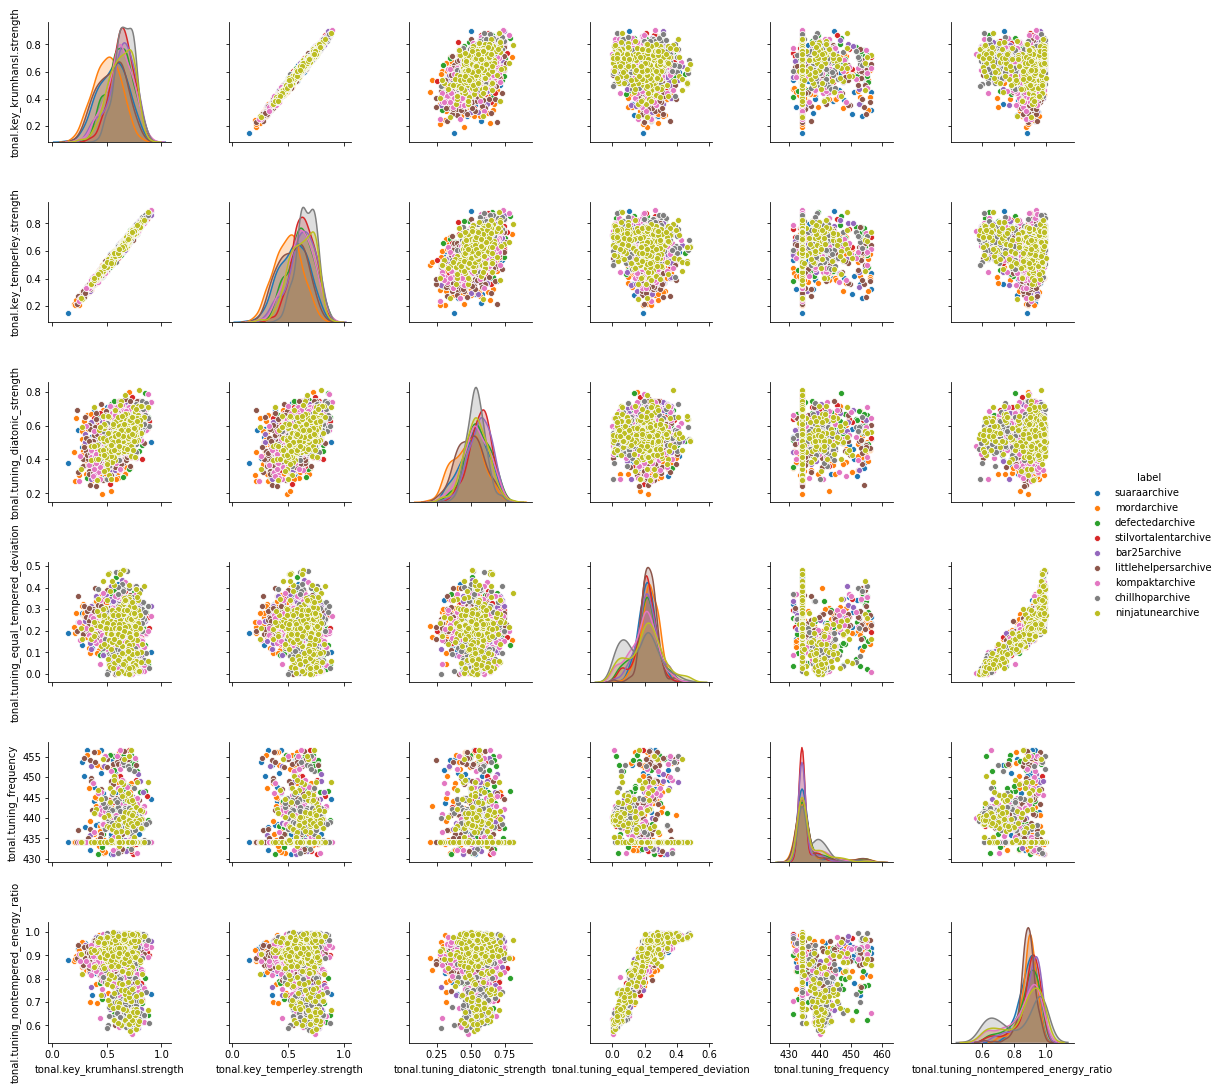

In [9]:
sns.pairplot(data.iloc[:, -7:], hue = "label");

In [10]:
#Descriptive statistics of the features:
data.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,...,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000
mean,0.909754,15.057568,5.766090,0.243782,0.102423,56.681888,124.724453,4.011900,3.840918,16.904768,...,5.772675,2.146480,0.729670,0.601507,0.601817,0.599011,0.536705,0.209895,436.338344,0.877839
std,0.146164,2.589179,1.032223,0.068178,0.032006,58.320969,141.712339,1.777462,1.893854,8.404971,...,1.090679,0.344744,0.090561,0.127664,0.128381,0.127047,0.097006,0.079822,4.677459,0.091904
min,0.000090,6.242251,1.960482,0.076715,0.018853,-0.140583,1.057721,-0.346919,0.442625,1.645402,...,3.289423,0.771853,0.466379,0.147053,0.147114,0.150550,0.196979,0.000612,431.193909,0.562107
25%,0.912105,13.364528,5.109092,0.197507,0.081610,20.193308,39.859310,2.746905,2.469053,10.794041,...,4.960461,1.911125,0.667793,0.519934,0.518951,0.515814,0.474619,0.171768,434.193115,0.847171
50%,0.964205,15.078300,5.805699,0.235734,0.100149,40.615837,83.259041,3.798715,3.572047,15.799517,...,5.569572,2.123368,0.730788,0.615509,0.612333,0.608768,0.540223,0.216196,434.193115,0.900898
75%,0.980031,16.815529,6.480834,0.281564,0.121398,69.862648,161.626267,5.021036,4.909116,21.943949,...,6.414634,2.378814,0.786621,0.694593,0.695420,0.693030,0.603858,0.255711,435.448914,0.941932
max,0.989935,23.000727,8.552135,0.570250,0.250041,704.598450,2372.521973,14.136965,14.299258,69.774208,...,11.225224,3.460423,1.075490,0.911220,0.904209,0.897430,0.809259,0.480453,456.570251,0.999596




### Preprocessing of the features

**Normalisation of the features**

In [11]:
data_modif = data.copy()
#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_modif.iloc[:,:110] = min_max_scaler.fit_transform(data.iloc[:,:110].values)

In [12]:
data_modif.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,...,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000
mean,0.918997,0.526021,0.577337,0.338511,0.361483,0.080629,0.052148,0.300943,0.245247,0.223978,...,0.312918,0.511286,0.432255,0.594704,0.600589,0.600446,0.554854,0.436151,0.202726,0.721692
std,0.147664,0.154500,0.156595,0.138142,0.138440,0.082755,0.059757,0.122720,0.136675,0.123369,...,0.137438,0.128226,0.148677,0.167063,0.169570,0.170104,0.158434,0.166351,0.184324,0.210071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921372,0.424995,0.477666,0.244749,0.271455,0.028853,0.016362,0.213605,0.146242,0.134284,...,0.210570,0.423746,0.330669,0.487957,0.491136,0.489054,0.453452,0.356693,0.118189,0.651592
50%,0.974006,0.527259,0.583346,0.322204,0.351647,0.057832,0.034663,0.286224,0.225843,0.207755,...,0.287324,0.502689,0.434090,0.613028,0.614479,0.613510,0.560600,0.449283,0.118189,0.774399
75%,0.989995,0.630921,0.685769,0.415066,0.443560,0.099332,0.067709,0.370616,0.322336,0.297944,...,0.393812,0.597701,0.525753,0.716519,0.724223,0.726329,0.664532,0.531632,0.167676,0.868194
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#input values put in a matrix, there are 110 features
x = data_modif.iloc[:,:110]
#Creating output values
data_modif.label = pd.Categorical(data_modif.label)#convert to categorical data
y = np.array(data_modif.label.cat.codes) #create label encoded outputs
#Print the first sample
print("Features of the first sample: ", x.values)
print("Class of the first sample: ", y[0])

Features of the first sample:  [[0.98375249 0.53700784 0.69793586 ... 0.45505929 0.11818908 0.75961675]
 [0.85409803 0.4394399  0.72623661 ... 0.43771844 0.11818908 0.70730764]
 [0.99341862 0.60976467 0.69123165 ... 0.53143004 0.11818908 0.90935155]
 ...
 [0.97622613 0.36276121 0.51448925 ... 0.70815912 0.11818908 0.94935591]
 [0.97329668 0.27840878 0.40930974 ... 0.23920177 0.13796703 0.57597335]
 [0.86596235 0.49270307 0.76882333 ... 0.44456425 0.11818908 0.79484676]]
Class of the first sample:  8


In [14]:
print(y.shape)

(2169,)


In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=110)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(110,'Score'))  #print k best features

                                     Specs       Score
49                 silence_rate_60dB.stdev  105.951367
45                 silence_rate_20dB.stdev   74.827853
75                  spectral_rolloff.stdev   62.949966
21                 erbbands_skewness.stdev   58.555060
10                  barkbands_spread.stdev   55.493199
..                                     ...         ...
89  rhythm.bpm_histogram_first_peak_weight    3.582148
54                  spectral_decrease.mean    3.210261
65    spectral_energyband_middle_low.stdev    2.588788
0                         average_loudness    1.845101
44                  silence_rate_20dB.mean    0.497041

[110 rows x 2 columns]


In [16]:
X_new = bestfeatures.fit_transform(x, y)

In [17]:
print ( X_new.shape)

(2169, 110)


In [18]:
from numpy import save
save('y.npy', y)

## SVM TRAINING AND TESTING

In [19]:
#All output values: 
print(y)

[8 8 8 ... 6 6 6]


**Splitting data into train and test subsets**

In [20]:
#Let's split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42) #random_state = 20 or 42

In [21]:
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (1735, 110) , Size of train output vector:  (1735,)
Size of test features matrix:  (434, 110) , Size of test output vector:  (434,)


**Defining the machine learning model and training it**

Now we can train a machine learning model. Let's pick a Support Vector Machine (SVM) model and feed our data to train it.

In [22]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate 
#clf = svm.SVC(gamma = 1 / (X_train.shape[-1] * X_train.var()))
tuned_parameters = [{'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}]
                    
 #cross-validation for gamma:
clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=10) #C-Support Vector Classification based on libsvm

scores = cross_validate (clf, X_new, y, cv=10, return_estimator=True)
clf= scores ['estimator'][int(np.argmax(scores['test_score']))]
clf.fit(X_train, y_train)   


print(clf.best_params_)                    

{'gamma': 1}


**Testing the model**



In [23]:
y_pred = clf.predict(X_test)

In [24]:
#Let's check for each sample in the test set if prediction matches the true class information
y_test == y_pred

array([False, False, False, False, False,  True, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False,  True, False,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,

In [46]:
#Data is balanced, so you can use accuracy as a measure:
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

accuracy:  0.6059907834101382


**Observation:** the accuracy looks good but keep in mind that we have a small dataset and simply obtained a random subset for testing


As the final step, let's also print the **confusion matrix**

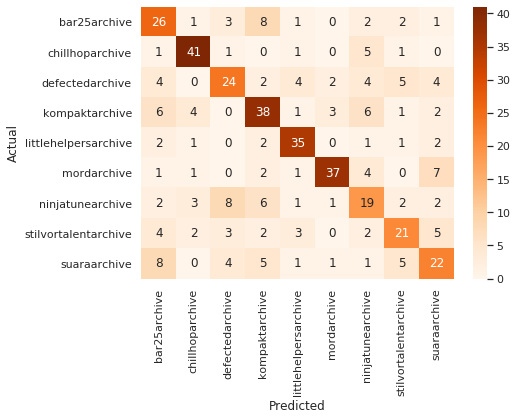

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(data_modif.label)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1)
sns.heatmap(conf_mat, cmap = "Oranges", annot_kws = {"size": 12}, annot = True);

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.59      0.53        44
           1       0.77      0.82      0.80        50
           2       0.56      0.49      0.52        49
           3       0.58      0.62      0.60        61
           4       0.73      0.80      0.76        44
           5       0.84      0.70      0.76        53
           6       0.43      0.43      0.43        44
           7       0.55      0.50      0.53        42
           8       0.49      0.47      0.48        47

    accuracy                           0.61       434
   macro avg       0.60      0.60      0.60       434
weighted avg       0.61      0.61      0.61       434



### How about Deep Learning?

We would often prefer deep learning based architectures when the data size is large. See Andrew Ng's figure from his [Coursera course](https://www.coursera.org/learn/neural-networks-deep-learning/):

<img src=https://raw.githubusercontent.com/mbadry1/DeepLearning.ai-Summary/master/1-%20Neural%20Networks%20and%20Deep%20Learning/Images/11.png width="700">

The data size in our case is small and the methods examplified above are just fine. Below, for the sake of presenting an example using a deep learning architecture, we build (with Keras) and train a DNN using the same features. For cases with larger data sets, feature extraction step can be dropped and end-to-end systems(audio->label) can be designed. Due to the size of our data, we will stick with our features.


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
#Let's start by splitting our data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42)
#..and apply normalisation
scaler = StandardScaler().fit(X_train_val)
norm_x_train_val = scaler.transform(X_train_val)
norm_x_test = scaler.transform(X_test)

Our neural network will have 4 neurons at the output layer each of which will output the estimated probability of the sample belonging to a class. So, let's convert our labels to **one-hot encoding** to fit to that representation.
Example: a sample belonging to the 'violin' class is represented with 3 (integer encoded) will be represented with  [0 0 0 1]. Similarly, a 'ebclar' sample represented with with 0 will be represented with [1 0 0 0]

In [40]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train_val_onehot = onehot_encoder.fit_transform(y_train_val.reshape(len(y_train_val), 1))
y_test_onehot = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
print("One-hot encoded y_train_val shape = ", y_train_val_onehot.shape)
print("One-hot encoded y_test shape = ", y_test_onehot.shape)

One-hot encoded y_train_val shape =  (1735, 9)
One-hot encoded y_test shape =  (434, 9)


**Let's define our deep learning architecture**

In [47]:
!pip3 install keras

In [48]:
!pip3 install tensorflow

In [41]:
from keras.models import Sequential
from keras import layers

def compose_model(num_features):
    
    model = Sequential()

    # Input layer 
    model.add(layers.BatchNormalization(name='InputLayer', input_shape=(num_features,)))
    
    # 1. hidden layer
    model.add(layers.Dense(name='HiddenLayer_1', units = 110))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('tanh'))
    model.add(layers.Dropout(0.3))

    # 2. hidden layyer
    model.add(layers.Dense(name='HiddenLayer_2', units = 50))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))

    # Output layer
    model.add(layers.Dense(name='Output_layer', units = 9))
    model.add(layers.Activation('sigmoid'))
    
    return model

model = compose_model(X_train_val.shape[1])

You can have a look at the summary of the model

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (BatchNormalizati (None, 110)               440       
_________________________________________________________________
HiddenLayer_1 (Dense)        (None, 110)               12210     
_________________________________________________________________
batch_normalization_5 (Batch (None, 110)               440       
_________________________________________________________________
activation_7 (Activation)    (None, 110)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 110)               0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 50)                5550      
_________________________________________________________________
batch_normalization_6 (Batch (None, 50)               

Let's pick an optimizer, compile the model and train the network

In [43]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['acc'])
summary = model.fit(X_train_val, y_train_val_onehot, batch_size = 50, epochs = 50, validation_split=0.2, verbose=0,shuffle= True)

Testing the trained model

In [44]:
score = model.evaluate(X_test, y_test_onehot, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1139989997934086
Test accuracy: 0.6221198439598083


It is a good and common practice to check the learning curves

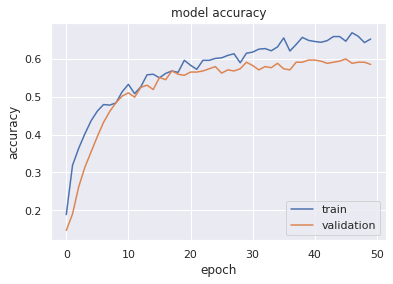

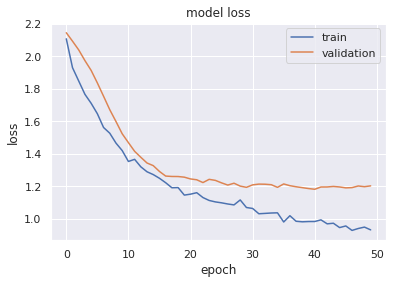

In [45]:
# summarize history for accuracy
plt.plot(summary.history['acc'])
plt.plot(summary.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [49]:
import sklearn
y=model.predict(X_test)
print(np.argmax(y))

1144


In [50]:
y_pred = y.argmax(axis=1)

In [51]:
sklearn.metrics.f1_score(y_test, y_pred, average='micro')

0.6221198156682027

In [52]:
import sklearn.metrics
sklearn.metrics.hamming_loss(y_test, y_pred, sample_weight=None)

0.3778801843317972

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.61      0.50        44
           1       0.83      0.90      0.87        50
           2       0.55      0.43      0.48        49
           3       0.62      0.66      0.64        61
           4       0.75      0.75      0.75        44
           5       0.85      0.75      0.80        53
           6       0.58      0.41      0.48        44
           7       0.48      0.55      0.51        42
           8       0.53      0.49      0.51        47

    accuracy                           0.62       434
   macro avg       0.62      0.62      0.62       434
weighted avg       0.63      0.62      0.62       434



**Saving the model**

In [35]:
model.save("boc_60s/kerasmodel60s.h5")
print("Model Saved")

Model Saved


## Model Prediction on New Data

In [58]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('boc_60s/kerasmodel60s.h5')
# summarize model.
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (BatchNormalizati (None, 110)               440       
_________________________________________________________________
HiddenLayer_1 (Dense)        (None, 1)                 111       
_________________________________________________________________
batch_normalization_3 (Batch (None, 1)                 4         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1)                 0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 3)                 6         
_________________________________________________________________
batch_normalization_4 (Batch (None, 3)                

In [ ]:
# load dataset
dataset = loadtxt("boc_60s/data_1mn_only_9.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))